In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import src.gamestate as gamestate
import src.dem as dem
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [201]:
def extract_attacks(raw_response):
    rows = []
    data = gamestate.decode(dem.run(raw_response))
    before_health = 0
    before_shoot = -1
    for i in range(len(data["details"]["turns"])):
        turn = data["details"]["turns"][i]
        if len(turn["data"])!=2:
            continue
        if turn["data"][0]["state"]["is_defender"]:
            def_id = 0
            atk_id = 1
        else:
            def_id = 1
            atk_id = 0
        
        atk_data = turn["data"][atk_id]
        def_data = turn["data"][def_id]
        atk_state = atk_data["state"]
        def_state = def_data["state"]
        atk_params = atk_state["parameters"]
        def_params = def_state["parameters"]
        def_sum = def_state["max_heat"] - def_state["heat"] + def_params["health"]+def_params["fuel"]+ def_params["cool_speed"]+def_params["attack"]
        atk_sum = atk_state["max_heat"] - atk_state["heat"] + atk_params["health"]+atk_params["fuel"]+ atk_params["cool_speed"]+atk_params["attack"]
        d_h = before_health - def_sum
        if before_health == 0:
            before_health = def_sum
            continue
        before_health = def_params["health"]
        if atk_data["command"] == None:
            continue
        for command in atk_data["command"]:
            if command[0] !=2:
                continue
            d_shoot=i-before_shoot
            before_shoot = i
            to_x, to_y = command[1][0], command[1][1]
            if atk_params["health"] == 0 or def_params["health"] == 0:
                continue
            if to_x != def_state["location"]["x"] or to_y != def_state["location"]["y"]: 
                continue
            
            dx = to_x - atk_state["location"]["x"]
            dy = to_y - atk_state["location"]["y"]
            dist = np.sqrt(dx**2 + dy**2)
            
            p1 = command[2]
            p2 = command[3]
            
            target = p2/p1
            if target < 0.5:
                continue
            row={"target":target}
            row.update(atk_params)
            row["d_h"] = d_h
            row["select"] = p1 / atk_params["attack"]
            row["def_sum"] = def_sum
            row["atk_sum"] = atk_sum
            row["p2"] = p2
            row["d_shoot"] = d_shoot
            rows.append(row)
    return rows

with open("saved_responses.in") as f:
    rows = []
    lines = f.readlines()
    for i in range(len(lines)):
        print(f"loading {i+1}/{len(lines)}")
        rows += extract_attacks(lines[i])

loading 1/182
loading 2/182
loading 3/182
loading 4/182
loading 5/182
loading 6/182
loading 7/182
loading 8/182
loading 9/182
loading 10/182
loading 11/182
loading 12/182
loading 13/182
loading 14/182
loading 15/182
loading 16/182
loading 17/182
loading 18/182
loading 19/182
loading 20/182
loading 21/182
loading 22/182
loading 23/182
loading 24/182
loading 25/182
loading 26/182
loading 27/182
loading 28/182
loading 29/182
loading 30/182
loading 31/182
loading 32/182
loading 33/182
loading 34/182
loading 35/182
loading 36/182
loading 37/182
loading 38/182
loading 39/182
loading 40/182
loading 41/182
loading 42/182
loading 43/182
loading 44/182
loading 45/182
loading 46/182
loading 47/182
loading 48/182
loading 49/182
loading 50/182
loading 51/182
loading 52/182
loading 53/182
loading 54/182
loading 55/182
loading 56/182
loading 57/182
loading 58/182
loading 59/182
loading 60/182
loading 61/182
loading 62/182
loading 63/182
loading 64/182
loading 65/182
loading 66/182
loading 67/182
load

In [221]:
def extract_attacks(raw_response):
    rows = []
    data = gamestate.decode(dem.run(raw_response))
    before_health = 0
    before_shoot = -1
    for i in range(1, len(data["details"]["turns"])):
        prev = data["details"]["turns"][i-1]
        turn = data["details"]["turns"][i]
        if len(turn["data"])!=2:
            continue
        if turn["data"][0]["state"]["is_defender"]:
            def_id = 0
            atk_id = 1
        else:
            def_id = 1
            atk_id = 0
        if prev["data"][0]["state"]["is_defender"]:
            pdef_id = 0
            patk_id = 1
        else:
            pdef_id = 1
            patk_id = 0
        
        atk_data = turn["data"][atk_id]
        def_data = turn["data"][def_id]
        patk_data = prev["data"][patk_id]
        pdef_data = prev["data"][pdef_id]
        if def_data["command"] != None:
            continue
        
        atk_state = atk_data["state"]
        def_state = def_data["state"]
        atk_params = atk_state["parameters"]
        def_params = def_state["parameters"]
        def_sum = def_state["max_heat"] - def_state["heat"] + def_params["health"]+def_params["fuel"]+ def_params["cool_speed"]+def_params["attack"]
        atk_sum = atk_state["max_heat"] - atk_state["heat"] + atk_params["health"]+atk_params["fuel"]+ atk_params["cool_speed"]+atk_params["attack"]
        
        pdef_state = pdef_data["state"]
        pdef_params = pdef_state["parameters"]
        pdef_sum = pdef_state["max_heat"] - pdef_state["heat"] + pdef_params["health"]+pdef_params["fuel"]+ pdef_params["cool_speed"]+pdef_params["attack"]

        
        if atk_data["command"] == None:
            continue
        for command in atk_data["command"]:
            if command[0] !=2:
                continue
            to_x, to_y = command[1][0], command[1][1]
            if atk_params["health"] == 0 or def_params["health"] == 0:
                continue
            if to_x != def_state["location"]["x"] or to_y != def_state["location"]["y"]: 
                continue
            
            
            
            dx = to_x - atk_state["location"]["x"]
            dy = to_y - atk_state["location"]["y"]
            dist = np.sqrt(dx**2 + dy**2)
            
            p1 = command[2]
            p2 = command[3]
            
            target = p2/p1
            
            predicted_sum = pdef_sum + pdef_params["cool_speed"]
            damage = predicted_sum - def_sum
            
            print(p2, damage, p1, pdef_params,def_params, pdef_state["max_heat"]-pdef_state["heat"])
            rows.append({"p2":p2, "damage": damage})
            
    return rows

with open("saved_responses.in") as f:
    rows = []
    lines = f.readlines()
    for i in range(len(lines)):
        print(f"loading {i+1}/{len(lines)}")
        rows += extract_attacks(lines[i])

loading 1/182
0 0 4 {'fuel': 0, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 0, 'attack': 0, 'cool_speed': 10, 'health': 1} 36
loading 2/182
loading 3/182
loading 4/182
loading 5/182
loading 6/182
loading 7/182
loading 8/182
0 0 16 {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} 15
0 0 16 {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} 16
0 0 16 {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} 17
0 0 16 {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 25, 'attack': 1, 'cool_speed': 1, 'health': 1} 18
loading 9/182
loading 10/182
7 7 9 {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} 16
115 115 50 {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 0, 'attack': 40, 'cool_speed': 16, 'health': 1}

loading 15/182
loading 16/182
loading 17/182
0 16 16 {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} 64
0 16 16 {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} 64
loading 18/182
loading 19/182
0 0 1 {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} 20
0 0 8 {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} 30
0 0 8 {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} 40
0 0 8 {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} 50
0 6 8 {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'health': 1} 60
0 0 13 {'fuel': 60, 'attack': 64, 'cool_speed': 10, 'h

45 45 30 {'fuel': 73, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 71, 'attack': 42, 'cool_speed': 16, 'health': 1} 27
89 89 30 {'fuel': 71, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 30, 'attack': 42, 'cool_speed': 16, 'health': 1} 32
44 44 30 {'fuel': 30, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 30, 'attack': 42, 'cool_speed': 16, 'health': 1} 32
0 0 30 {'fuel': 30, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 30, 'attack': 42, 'cool_speed': 16, 'health': 1} 36
53 53 30 {'fuel': 30, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 16, 'attack': 42, 'cool_speed': 16, 'health': 1} 23
17 17 30 {'fuel': 16, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 16, 'attack': 42, 'cool_speed': 16, 'health': 1} 39
loading 22/182
0 10 16 {'fuel': 202, 'attack': 30, 'cool_speed': 10, 'health': 1} {'fuel': 202, 'attack': 30, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 202, 'attack': 30, 'cool_speed': 10, 'health': 1} {'fuel': 202, 'attack':

loading 39/182
0 15 16 {'fuel': 95, 'attack': 0, 'cool_speed': 15, 'health': 1} {'fuel': 95, 'attack': 0, 'cool_speed': 15, 'health': 1} 64
loading 40/182
loading 41/182
0 10 16 {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 265, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 239, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 239, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 239, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 239, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
98 98 58 {'fuel': 239, 'attack': 0, 'cool_speed': 10, 'health': 1} {

loading 67/182
loading 68/182
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 312, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 312, '

loading 73/182
loading 74/182
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 8 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'a

0 16 16 {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} 64
13 16 16 {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 0, 'attack': 0, 'cool_speed': 16, 'health': 1} 64
loading 77/182
loading 78/182
0 15 16 {'fuel': 101, 'attack': 0, 'cool_speed': 15, 'health': 1} {'fuel': 101, 'attack': 0, 'cool_speed': 15, 'health': 1} 64
loading 79/182
0 0 40 {'fuel': 0, 'attack': 0, 'cool_speed': 15, 'health': 1} {'fuel': 0, 'attack': 0, 'cool_speed': 15, 'health': 1} 0
loading 80/182
0 16 8 {'fuel': 123, 'attack': 32, 'cool_speed': 16, 'health': 1} {'fuel': 123, 'attack': 32, 'cool_speed': 16, 'health': 1} 128
0 16 16 {'fuel': 123, 'attack': 32, 'cool_speed': 16, 'health': 1} {'fuel': 123, 'attack': 32, 'cool_speed': 16, 'health': 1} 128
0 16 16 {'fuel': 123, 'attack': 32, 'cool_speed': 16, 'health': 1} {'fuel': 123, 'attack': 32, 'cool_speed': 16, 'health': 1} 128
0 16 8 {'fuel': 123, 'attack': 32, 'cool_speed': 16, 'he

loading 89/182
loading 90/182
loading 91/182
loading 92/182
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 36
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 37
0 0 8 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 38
0 0 8 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 39
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 40
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 41
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 42
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1,

loading 97/182
loading 98/182
loading 99/182
0 0 14 {'fuel': 80, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 80, 'attack': 42, 'cool_speed': 16, 'health': 1} 0
96 96 50 {'fuel': 80, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 48, 'attack': 42, 'cool_speed': 16, 'health': 1} 48
0 0 8 {'fuel': 48, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 48, 'attack': 42, 'cool_speed': 16, 'health': 1} 16
34 34 25 {'fuel': 0, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 0, 'attack': 42, 'cool_speed': 16, 'health': 1} 32
loading 100/182
0 7 8 {'fuel': 162, 'attack': 50, 'cool_speed': 7, 'health': 1} {'fuel': 162, 'attack': 50, 'cool_speed': 7, 'health': 1} 128
0 7 16 {'fuel': 162, 'attack': 50, 'cool_speed': 7, 'health': 1} {'fuel': 162, 'attack': 50, 'cool_speed': 7, 'health': 1} 128
0 7 8 {'fuel': 162, 'attack': 50, 'cool_speed': 7, 'health': 1} {'fuel': 162, 'attack': 50, 'cool_speed': 7, 'health': 1} 128
0 7 16 {'fuel': 162, 'attack': 50, 'cool_speed': 7, 'hea

0 0 8 {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} 49
0 0 16 {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} 56
0 0 16 {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} 63
0 0 16 {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} 70
0 0 16 {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} 77
0 0 16 {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} {'fuel': 0, 'attack': 5, 'cool_speed': 7, 'health': 1} 84
loading 104/182
0 0 8 {'fuel': 62, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 62, 'attack': 42, 'cool_speed': 16, 'health': 1} 33
54 54 21 {'fuel': 47, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 42, 'attack': 42, 'cool_speed': 16, 'health': 1} 33
10 10 8 {'fu

loading 109/182
loading 110/182
loading 111/182
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 36
0 0 8 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 37
0 0 8 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 38
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 39
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 40
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 41
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} 42
0 0 16 {'fuel': 28, 'attack': 1, 'cool_speed': 1, 'health': 1} {'fuel': 28, 'attack': 1, 'cool_speed

loading 122/182
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'c

loading 125/182
0 1 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 55
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 8 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
98 98 58 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 289, 'attack': 0, 'co

loading 127/182
0 16 8 {'fuel': 242, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 242, 'attack': 0, 'cool_speed': 16, 'health': 1} 128
0 16 8 {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} 128
0 16 8 {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} 128
0 16 16 {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} 128
0 16 16 {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} 128
0 16 16 {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} 128
0 16 16 {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 241, 'attack': 0, 'cool_speed': 16, 'health': 1} 128
0 16 16 {'fuel': 240, 'attack': 0, 'cool_speed': 16, 'health': 1} {'fuel': 240, 'attack': 0

3 3 40 {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} 16
35 35 40 {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} 45
72 72 40 {'fuel': 72, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 58, 'attack': 42, 'cool_speed': 16, 'health': 1} 42
0 0 40 {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} 16
15 15 40 {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} 48
14 14 40 {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} 16
10 10 40 {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 49, 'attack': 42, 'cool_speed': 16, 'health': 1} 34
78 78 40 {'fuel': 46, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 31, 'attack': 42, 'cool_speed': 

loading 145/182
0 10 8 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 8 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'coo

loading 147/182
loading 148/182
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313,

loading 152/182
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 313, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 313, 'attack': 0, 'c

0 10 8 {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 314, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 281, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 281, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 280, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 280, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 7 6 {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} 61
0 10 16 {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} 64
0 10 16 {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'health': 1} {'fuel': 278, 'attack': 0, 'cool_speed': 10, 'he

loading 157/182
0 2 6 {'fuel': 200, 'attack': 30, 'cool_speed': 10, 'health': 1} {'fuel': 200, 'attack': 30, 'cool_speed': 10, 'health': 1} 56
127 127 58 {'fuel': 200, 'attack': 30, 'cool_speed': 10, 'health': 1} {'fuel': 147, 'attack': 30, 'cool_speed': 10, 'health': 1} 64
loading 158/182
0 0 30 {'fuel': 76, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 76, 'attack': 42, 'cool_speed': 16, 'health': 1} 44
20 20 30 {'fuel': 76, 'attack': 42, 'cool_speed': 16, 'health': 1} {'fuel': 76, 'attack': 42, 'cool_speed': 16, 'health': 1} 27
loading 159/182
loading 160/182
0 0 16 {'fuel': 0, 'attack': 30, 'cool_speed': 10, 'health': 1} {'fuel': 0, 'attack': 30, 'cool_speed': 10, 'health': 1} 32
0 0 16 {'fuel': 0, 'attack': 30, 'cool_speed': 10, 'health': 1} {'fuel': 0, 'attack': 30, 'cool_speed': 10, 'health': 1} 42
0 0 16 {'fuel': 0, 'attack': 30, 'cool_speed': 10, 'health': 1} {'fuel': 0, 'attack': 30, 'cool_speed': 10, 'health': 1} 52
0 8 16 {'fuel': 0, 'attack': 30, 'cool_speed': 10, 

In [222]:
df = pd.DataFrame(rows)

In [127]:
df = pd.DataFrame(attacks)
df["rh"] = df["mh"] - df["h"]
df["target"] = df["p2"]/df["p1"]
df["sum"] = df["f"] + df["atk"] + df["c"]
df["dist"] = np.sqrt(df["dx"]**2 + df["dy"]**2)
df["planet_d"] = np.sqrt(df["x"]**2 + df["y"]**2)

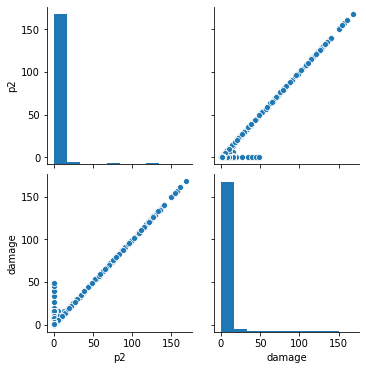

In [223]:
sns.pairplot(df)

In [129]:
X = df[["mh", "h", "d", "atk", "f", "c", "rh", "sum", "dist", "planet_d"]]
y = df["p2"]/df["p1"]
df["d"] = df["d"].astype("int32")

In [130]:
model = LinearRegression().fit(X, y)

In [131]:
model.score(X, y)

0.9983785420058362

In [134]:
df.shape

(570, 18)

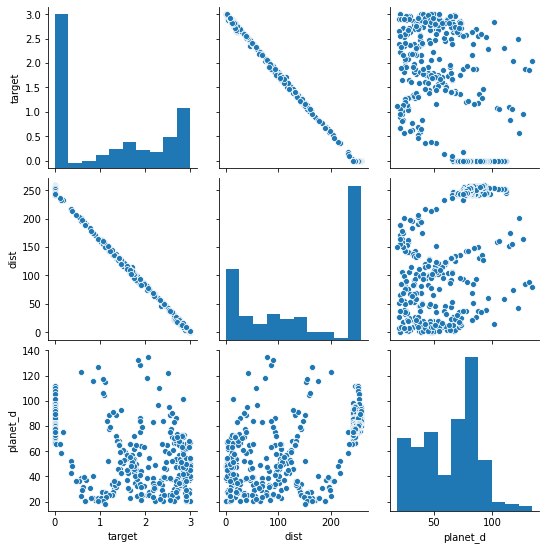

In [133]:
sns.pairplot(df[["target", "dist", "planet_d"]])